<a href="https://colab.research.google.com/github/NizarMazlan/Lovathon/blob/main/LovathonWithSyntheticDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Things**

In [ ]:
#importing libraries
import math
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [ ]:
#access data
df = pd.read_csv("/content/SyntheticDataset.csv")

#replace the categorical data into numerical
def gender_to_numeric(x):
  if x=='Male':
    return 0
  else:
    return 1

def academic_to_numeric(x):
  if x=='High School' or x=='Pre-U':
    return 0
  else:
    return 1

df['Gender_Num'] = df['Gender'].apply(gender_to_numeric)
df['Academic_Num'] = df['Gender'].apply(academic_to_numeric)
df = df.drop('Gender',1)
df = df.drop('AcademicLevel', 1)


#refined dataset
LoveData = df
LoveData


,Age,AvgInteract,StdyHour,BffTime,HobbyHour,SleepHour,Gender_Num,Academic_Num
0,22,37,11,6,6,6,1,1
1,25,16,8,5,6,4,1,1
2,27,43,9,7,7,7,0,1
3,23,29,2,5,6,8,1,1
4,32,27,9,5,8,10,1,1
...,...,...,...,...,...,...,...,...
9995,17,22,9,5,6,5,0,1
9996,25,27,11,5,7,3,0,1
9997,18,38,6,8,5,4,1,1
9998,24,29,16,6,7,8,0,1


# **Finding Outlier In The Data**

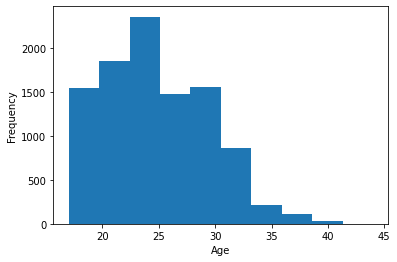

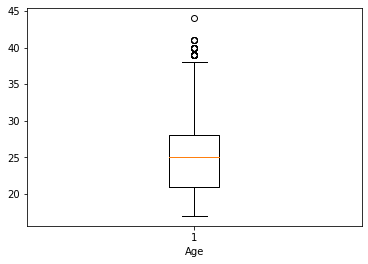

Text(0, 0.5, 'Average Interaction')

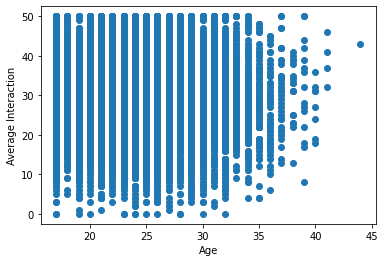

In [ ]:
#Age
pyplot.hist(LoveData.Age)
pyplot.xlabel("Age")
pyplot.ylabel("Frequency")
pyplot.show()
pyplot.boxplot(LoveData.Age)
pyplot.xlabel("Age")
pyplot.show()
pyplot.scatter(LoveData.Age, LoveData.AvgInteract)

pyplot.xlabel("Age")
pyplot.ylabel("Average Interaction")

This dataset is skewed and needed to be changed

In [ ]:
LoveData.Age.describe()

count    10000.00000
mean        24.69880
std          4.71857
min         17.00000
25%         21.00000
50%         25.00000
75%         28.00000
max         44.00000
Name: Age, dtype: float64

35.0


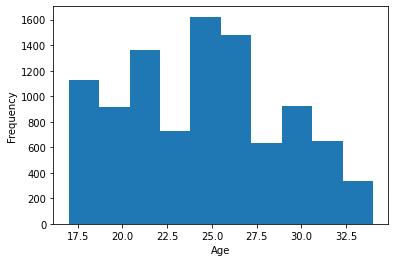

In [ ]:
#Testing how to find outliers
max_threshold = LoveData['Age'].quantile(0.98) #everything above this is considered as an outlier
print(max_threshold)
#remove all the outlier in the data
LoveData = LoveData[LoveData['Age'] < max_threshold]
pyplot.hist(LoveData.Age)
pyplot.xlabel("Age")
pyplot.ylabel("Frequency")
pyplot.show()

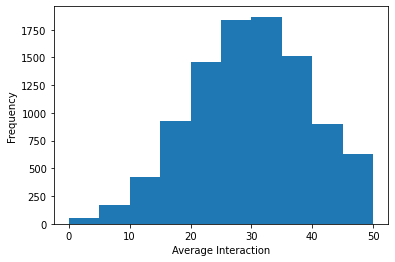

In [ ]:
#AvgInteract
pyplot.hist(LoveData.AvgInteract)
pyplot.xlabel("Average Interaction")
pyplot.ylabel("Frequency")
pyplot.show()

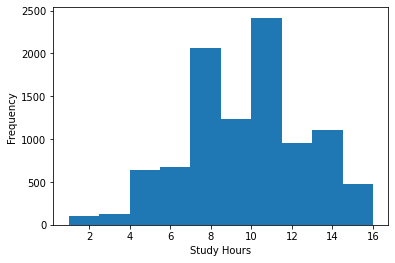

In [ ]:
#StudyHour
pyplot.hist(LoveData.StdyHour)
pyplot.xlabel("Study Hours")
pyplot.ylabel("Frequency")
pyplot.show()

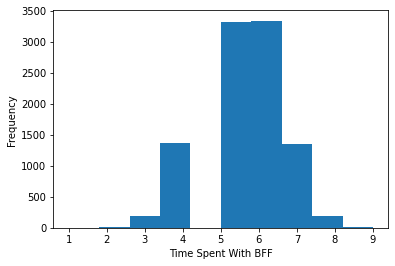

In [ ]:
#BffTime
pyplot.hist(LoveData.BffTime)
pyplot.xlabel("Time Spent With BFF")
pyplot.ylabel("Frequency")
pyplot.show()

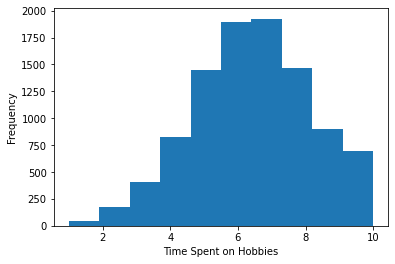

In [ ]:
#HobbyHour
pyplot.hist(LoveData.HobbyHour)
pyplot.xlabel("Time Spent on Hobbies")
pyplot.ylabel("Frequency")
pyplot.show()

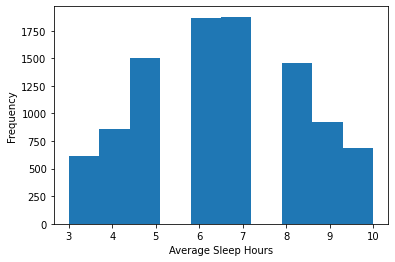

In [ ]:
#SleepHour
pyplot.hist(LoveData.SleepHour)
pyplot.xlabel("Average Sleep Hours")
pyplot.ylabel("Frequency")
pyplot.show()

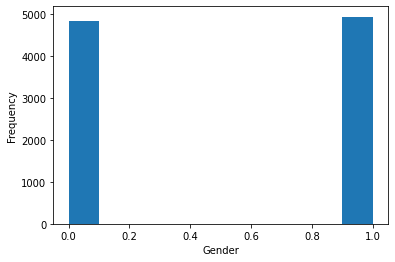

In [ ]:
#Gender
pyplot.hist(LoveData.Gender_Num)
pyplot.xlabel("Gender")
pyplot.ylabel("Frequency")
pyplot.show()

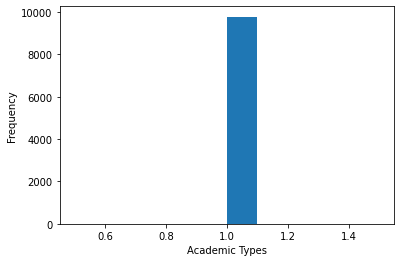

In [ ]:
#AcademicLevel
pyplot.hist(LoveData.Academic_Num)
pyplot.xlabel("Academic Types")
pyplot.ylabel("Frequency")
pyplot.show()

# **Training and Test Data**

In [ ]:
X = LoveData.drop("AvgInteract", 1)
y = LoveData["AvgInteract"]

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #test size is 20% of the dataset

#printing the shapes of testing and training dataset
print("shape of original dataset :", LoveData.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

x_test


shape of original dataset : (9773, 8)
shape of input - training set (7818, 7)
shape of output - training set (7818,)
shape of input - testing set (1955, 7)
shape of output - testing set (1955,)


,Age,StdyHour,BffTime,HobbyHour,SleepHour,Gender_Num,Academic_Num
3777,19,9,5,3,5,1,1
8551,22,5,5,7,4,1,1
6652,25,10,6,8,6,0,1
5280,25,9,5,5,5,1,1
7157,17,7,7,8,7,1,1
...,...,...,...,...,...,...,...
5413,29,14,6,5,6,1,1
90,17,12,7,6,4,1,1
8019,28,13,5,4,7,0,1
9756,22,4,6,8,7,1,1


# **Selecting Feature and Testing Model**

## **Linear Regression Feature Importance**

In [ ]:
#define the model
model = LinearRegression()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.coef_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: -0.00147
Feature : 1, Score: -0.00184
Feature : 2, Score: 0.06946
Feature : 3, Score: -0.03538
Feature : 4, Score: -0.02102
Feature : 5, Score: -0.00338
Feature : 6, Score: 0.00000


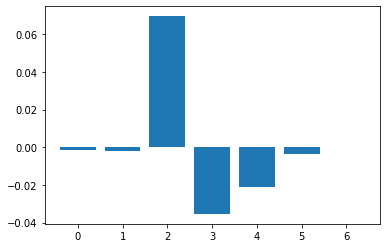

In [ ]:
#plotting the feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **CART Regression Feature Importance**

In [ ]:
#define the model
model = DecisionTreeRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: 0.17665
Feature : 1, Score: 0.22146
Feature : 2, Score: 0.14983
Feature : 3, Score: 0.16781
Feature : 4, Score: 0.22320
Feature : 5, Score: 0.06105
Feature : 6, Score: 0.00000


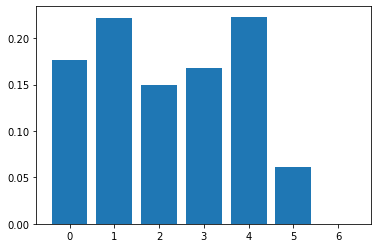

In [ ]:
#plotting the feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **Random Forest Regression Feature Importance**

In [ ]:
#Finding MAE value
#define the model
model = RandomForestRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: 0.22603
Feature : 1, Score: 0.21986
Feature : 2, Score: 0.12702
Feature : 3, Score: 0.17915
Feature : 4, Score: 0.18787
Feature : 5, Score: 0.06007
Feature : 6, Score: 0.00000


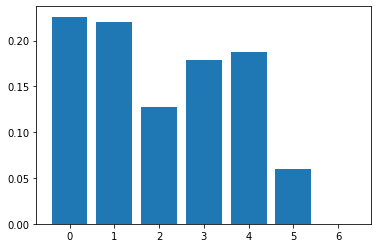

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **XGBoost Regression Feature Importance**

In [ ]:
#define the model
model = XGBRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

[15:10:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature : 0, Score: 0.17766
Feature : 1, Score: 0.14930
Feature : 2, Score: 0.09699
Feature : 3, Score: 0.16131
Feature : 4, Score: 0.19662
Feature : 5, Score: 0.21812
Feature : 6, Score: 0.00000


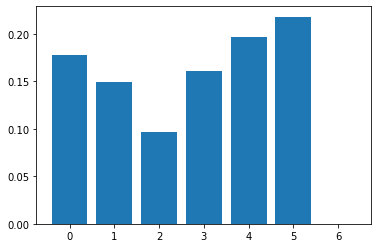

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **Permutation Feature Importance**

In [ ]:
#define the model
model = KNeighborsRegressor()
#fit the model
model.fit(x_train,y_train)
# perform permutation importance
results = permutation_importance(model, x_train,y_train, scoring='neg_mean_squared_error')
#get importance
importance = results.importances_mean
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: 32.95097
Feature : 1, Score: 27.19657
Feature : 2, Score: 10.73634
Feature : 3, Score: 22.52495
Feature : 4, Score: 23.26447
Feature : 5, Score: 0.37237
Feature : 6, Score: 0.00000


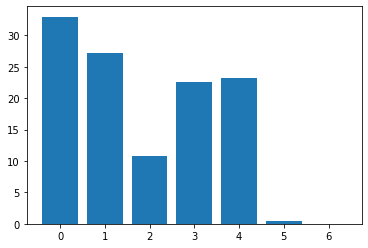

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# **MAE Values**

In [ ]:
#LinearRegression
X = x_train.drop("Academic_Num",1)
X = X.drop("Age", 1)
y = y_train

model = LinearRegression()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -7.871 (0.238)


In [ ]:
#CART
X = x_train.drop("Gender_Num",1)
X = x_train.drop("Academic_Num",1)
y = y_train

model = DecisionTreeRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -11.388 (0.257)


In [ ]:
#Random Forest
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

model = RandomForestRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -8.463 (0.220)


In [ ]:
#XGBoost
X = x_train.drop("StdyHour",1)
X = X.drop("Academic_Num",1)
y = y_train

model = XGBRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[15:11:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: -7.882 (0.236)


In [ ]:
#Permutation
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

model = KNeighborsRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -8.505 (0.234)


# **Fitting The Random Forest Regression Model**

In [ ]:
#Random Forest Regression
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

#Dropping features in the test dataset
X_test = x_test.drop("Gender_Num",1)
X_test = X_test.drop("Academic_Num",1)

#Fitting Random Forest Regression to the dataset
model = RandomForestRegressor()
model.fit(X,y)

#Predicting the result
y_pred = model.predict(X_test)

#Comparison dataframe
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred.reshape(-1)})
#calculate accuracy
errors = abs(y_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = metrics.mean_absolute_error(y_test, y_pred)
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('Initial model achieves on the test set an accuracy of', round(accuracy, 2),'%')


Initial model achieves on the test set an accuracy of 91.25 %


### **Fine Tuning the Random Forest Model**


Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X,y)


cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


9.850213435880478 {'bootstrap': True, 'max_depth': 10, 'n_estimators': 10}
9.79574583589601 {'bootstrap': True, 'max_depth': 10, 'n_estimators': 25}
10.901858103120587 {'bootstrap': True, 'max_depth': 50, 'n_estimators': 10}
10.659279537430859 {'bootstrap': True, 'max_depth': 50, 'n_estimators': 25}
10.85011401481468 {'bootstrap': True, 'max_depth': None, 'n_estimators': 10}
10.642320514342074 {'bootstrap': True, 'max_depth': None, 'n_estimators': 25}
9.996807658093251 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 10}
9.993582977077386 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 25}
13.692702230122926 {'bootstrap': False, 'max_depth': 50, 'n_estimators': 10}
13.657997926030596 {'bootstrap': False, 'max_depth': 50, 'n_estimators': 25}
13.674046505768482 {'bootstrap': False, 'max_depth': None, 'n_estimators': 10}
13.655094795920398 {'bootstrap': False, 'max_depth': None, 'n_estimators': 25}


In [ ]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X)
errors = abs(grid_best - y)
# Calculate mean absolute percentage error (MAPE)
mape = metrics.mean_absolute_error(y, grid_best)
# Calculate and display accuracy
accuracy = 100 - mape    
#accuracy
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 92.68 %


# **Evaluating The Model On The Test Set**

In [ ]:
final_model = grid_search_forest.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 10.02


In [ ]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = metrics.mean_absolute_error(y_test, final_pred)
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 91.91 %


# **Visualization of Random Forest Hyperparameters**

---
## Getting the accuracy


Text(0.5, 0, 'Tree depth')

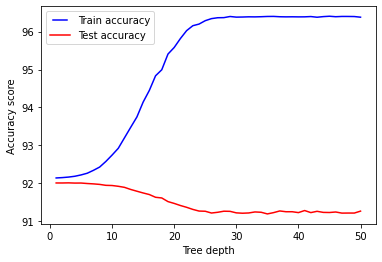

In [ ]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(X, y)    
    #compute accuracy for train data
    housing_tree = dt.predict(X)
    errors = abs(housing_tree - y)
    # Calculate mean absolute percentage error (MAPE)
    mape = metrics.mean_absolute_error(y, housing_tree)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(X_test)
    errors = abs(housing_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = metrics.mean_absolute_error(y_test, housing_tree)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = pyplot.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = pyplot.plot(max_depths, test_results, 'r', label= 'Test accuracy')

pyplot.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
pyplot.ylabel('Accuracy score')
pyplot.xlabel('Tree depth')

In [ ]:
X_test

,Age,StdyHour,BffTime,HobbyHour,SleepHour
3777,19,9,5,3,5
8551,22,5,5,7,4
6652,25,10,6,8,6
5280,25,9,5,5,5
7157,17,7,7,8,7
...,...,...,...,...,...
5413,29,14,6,5,6
90,17,12,7,6,4
8019,28,13,5,4,7
9756,22,4,6,8,7


# **Testing A Specific Data**

In [ ]:
#Testing a specific data
#20, 4, 2, 0, 6

test_test = { 'Age' : [20],'StdyHour' : [4], 'BffTime' : [2], 'HobbyHour' : [0] , 'SleepHour' : [6]}
test_DF = pd.DataFrame(test_test, columns = ['Age', 'StdyHour', 'BffTime', 'HobbyHour', 'SleepHour'])
test_pred = final_model.predict(test_DF)
test_pred/4


array([7.46280513])

# **Fitting The Linear Regression Model**

In [ ]:
#GUNA CARA RANDOM FOREST

#Linear Regression
X = x_train.drop("Age",1)
X = X.drop("Academic_Num",1)
y = y_train

#Dropping features in the test dataset
X_test = x_test.drop("Age",1)
X_test = X_test.drop("Academic_Num",1)

#Fitting Random Forest Regression to the dataset
model = LinearRegression()
model.fit(X,y)

#Predicting the result
y_pred = model.predict(X_test)

#Comparison dataframe
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred.reshape(-1)})
#calculate accuracy
errors = abs(y_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = metrics.mean_absolute_error(y_test, y_pred)
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('Initial model achieves on the test set an accuracy of', round(accuracy, 2),'%')

Initial model achieves on the test set an accuracy of 92.01 %


In [ ]:
#Linear Regression
X = x_train.drop("Age",1)
X = X.drop("Academic_Num",1)
y = y_train
m = y.size

#Dropping features in the test dataset
X_test = x_test.drop("Age",1)
X_test = X_test.drop("Academic_Num",1)

#Fitting Random Forest Regression to the dataset
model = LinearRegression()
model.fit(X,y)

#Predicting the result
y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print(model.score(X, y))

0.00012339377437475818


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.991535197962798
Mean Squared Error: 98.50570405482694
Root Mean Squared Error: 9.92500398261013


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: StdyHour      9.522384
BffTime       5.498337
HobbyHour     6.515733
SleepHour     6.535943
Gender_Num    0.506523
dtype: float64
Computed standard deviation: StdyHour      2.977157
BffTime       1.034854
HobbyHour     1.931567
SleepHour     1.885654
Gender_Num    0.499957
dtype: float64


In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
def computeCostMulti(X, y, theta):
    # Initialize some useful values
    m = y.shape[0] # number of training examples
  
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()

    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta computed from gradient descent: [ 2.94588378e+01 -5.41010813e-03  7.16428008e-02 -6.83231912e-02
 -3.96654013e-02 -1.69058295e-03]


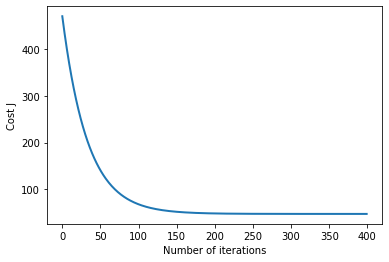

In [ ]:
# Choose some alpha value
alpha = 0.015
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [ ]:
X

array([[ 1.        , -1.18313668,  0.48476665, -1.30243133,  1.83705856,
        -1.01313305],
       [ 1.        ,  2.17577195,  0.48476665,  0.76842654, -1.3448609 ,
        -1.01313305],
       [ 1.        ,  0.16042677,  0.48476665, -1.30243133, -0.28422108,
         0.98703719],
       ...,
       [ 1.        , -2.19080928,  0.48476665,  0.25071207,  0.24609883,
        -1.01313305],
       [ 1.        ,  0.8322085 ,  1.45108632, -0.78471687, -1.3448609 ,
        -1.01313305],
       [ 1.        ,  2.17577195, -0.48155301,  1.80385548, -0.81454099,
        -1.01313305]])

In [ ]:
# testing specific data
#'StudyHours = 5','BffTime = 5','HobbyHour = 2','SleepHours = 9', 'Gender = 1',
X_array = [1, 25, 5, 5, 2, 9]
X_array[1:6] = (X_array[1:6] - mu) / sigma
avgInteract = np.dot(X_array, theta)   # You should change this

In [ ]:
print('Predicted Average Interaction if you are StudyHours = 5,BffTime = 5,HobbyHour = 2,SleepHours = 9, Gender = Woman (using normal equations): {:.0f}'.format(avgInteract/4))